In [35]:
import random
import matplotlib.pyplot as plt
from torch import nn
from d2l import torch as d2l

In [14]:
DIGITS = list(range(1, 9))   #range of password between 1-8
PASSWORD_LENGTH = 4
POPULATION_SIZE = 100        #100 password combinations in each generation
GENERATIONS = 100
MUTATION_RATE = 0.1
TOURNAMENT_SIZE = 5

In [4]:
#generate legal password
def generate_random_password():
    return random.sample(DIGITS, PASSWORD_LENGTH)

In [6]:
#get feedback(green=right number + right possition; yellow = right number + wrong possition )
def get_feedback(guess, password):
    green = sum(g == p for g, p in zip(guess, password))
    yellow = sum(min(guess.count(d), password.count(d)) for d in set(guess)) - green
    return green, yellow

In [26]:
#fitness function
def fitness(guess, password):
    green, yellow = get_feedback(guess, password)
    return green * 2 + yellow

In [9]:
#tournament_selection
def tournament_selection(population, scores):
    selected = random.sample(list(zip(population, scores)), TOURNAMENT_SIZE)
    selected.sort(key = lambda x: x[1], reverse = True)  #For each element x in the list, take its 2nd entry (x[1]), by descending order.
    return selected[0][0]

In [10]:
#crossover operation
def crossover(p1, p2):
    child = []
    for i in range(PASSWORD_LENGTH):
        #randomly select a gene from p1 or p2, each probability is 0.5
        gene = p1[i] if random.random() < 0.5 else p2[i]
        if gene not in child:
            child.append(gene)
        
    #completing the remaining genes
    while len(child) < PASSWORD_LENGTH:
        candidate = random.choice(DIGITS)
        if candidate not in child:
            child.append(candidate)
    return child

In [30]:
#main evolution function
def run_ga(password):
    #initialize population & history
    population = [generate_random_password() for _ in range(POPULATION_SIZE)]
    history_best = []
    
    #iterating multiple generations
    for generation in range(GENERATIONS):
        scores = [fitness(ind, password) for ind in population]
        best_index, best_score = max(enumerate(scores), key=lambda x: x[1])
        best_individual = population[best_index]
        history_best.append(best_score)
        print(f"第 {generation + 1} 代 | 最佳猜测：{best_individual} | 分数：{best_score}")
        
        if best_score == PASSWORD_LENGTH * 2:
            print(f"✅ 密码猜中：{best_individual}（第 {generation + 1} 代）")
            break
        
        #evolutionary generation of a new generation
        new_population = []
        for _ in range(POPULATION_SIZE):
            parent1 = tournament_selection(population, scores)
            parent2 = tournament_selection(population, scores)
            child = crossover(parent1, parent2)
            new_population.append(child)
            
        population = new_population
        
    return history_best, best_individual

In [65]:
#set a password automatically
user_password = generate_random_password()
print(f"🧠 隐藏的密码已自动生成（运行结束后显示）...")

🧠 隐藏的密码已自动生成（运行结束后显示）...


In [66]:
history, solution = run_ga(user_password)

第 1 代 | 最佳猜测：[7, 2, 5, 3] | 分数：5
第 2 代 | 最佳猜测：[7, 2, 3, 5] | 分数：6
第 3 代 | 最佳猜测：[5, 2, 3, 7] | 分数：8
✅ 密码猜中：[5, 2, 3, 7]（第 3 代）


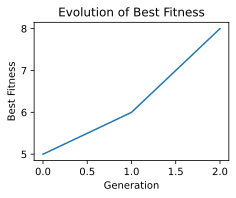

In [67]:
#visualization
d2l.set_figsize()
d2l.plt.plot(history)
d2l.plt.xlabel('Generation')
d2l.plt.ylabel('Best Fitness')
d2l.plt.title('Evolution of Best Fitness')
plt.show()